In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

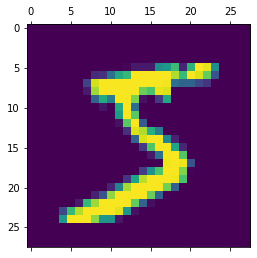

In [6]:
plt.matshow(x_train[0])

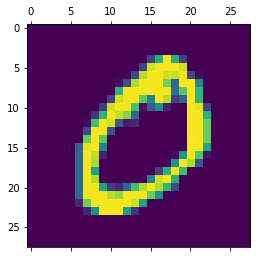

In [7]:
plt.matshow(x_train[1])

In [8]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [9]:
x_train = x_train / 255
x_test = x_test / 255      # Scaling for better results

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3038 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2735 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9256


In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2685 - accuracy: 0.9259


[0.2684704661369324, 0.9258999824523926]

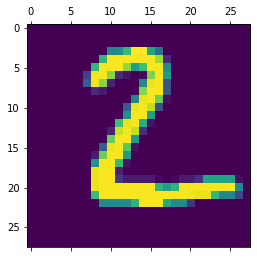

In [16]:
plt.matshow(x_test[1])

In [17]:
y_predicted = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [18]:
y_predicted[1]

array([5.1280648e-01, 3.5405045e-03, 9.9930811e-01, 3.7305844e-01,
       6.3390204e-10, 8.5097343e-01, 8.2692283e-01, 8.7585608e-13,
       1.6635065e-01, 2.6554223e-09], dtype=float32)

In [19]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [21]:
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [22]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [23]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   8,    9,  922,   20,    7,    2,   10,   10,   40,    4],
       [   4,    0,   18,  923,    0,   22,    2,   11,   24,    6],
       [   2,    1,    8,    1,  913,    0,    7,    4,   11,   35],
       [  11,    2,    3,   34,    9,  776,   11,    9,   31,    6],
       [  13,    3,    9,    1,    8,   15,  902,    2,    5,    0],
       [   1,    5,   21,    8,    6,    1,    0,  956,    3,   27],
       [   9,    6,    6,   18,    9,   21,    8,   11,  880,    6],
       [  11,    5,    1,   11,   27,    6,    0,   27,   10,  911]])>

Text(69.0, 0.5, 'Truth')

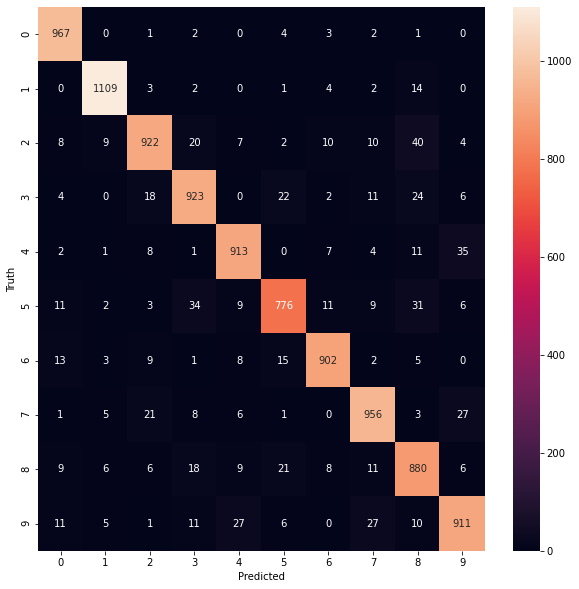

In [24]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2748 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1258 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0678 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0544 - accuracy: 0.9833


In [26]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9743


[0.08302048593759537, 0.9743000268936157]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

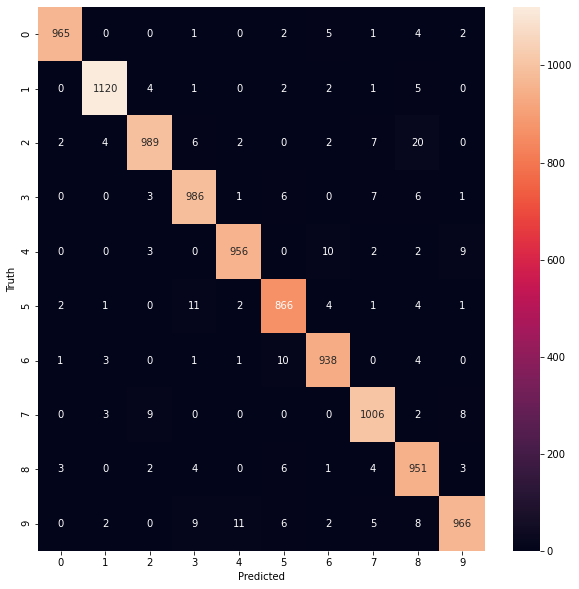

In [27]:
y_predicted_2 = model2.predict(x_test)
y_predicted_labels_2 = [np.argmax(i) for i in y_predicted_2]
cm = tf.math.confusion_matrix(y_test,y_predicted_labels_2)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(300,activation = 'sigmoid'),
    keras.layers.Dense(100,activation = 'sigmoid'),
    keras.layers.Dense(200,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3715 - accuracy: 0.8875
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1500 - accuracy: 0.9543
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1018 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0745 - accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0560 - accuracy: 0.9824


In [29]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0920 - accuracy: 0.9712


[0.0919807031750679, 0.9711999893188477]

313/313 [==============================] - 1s 4ms/step


Text(69.0, 0.5, 'Truth')

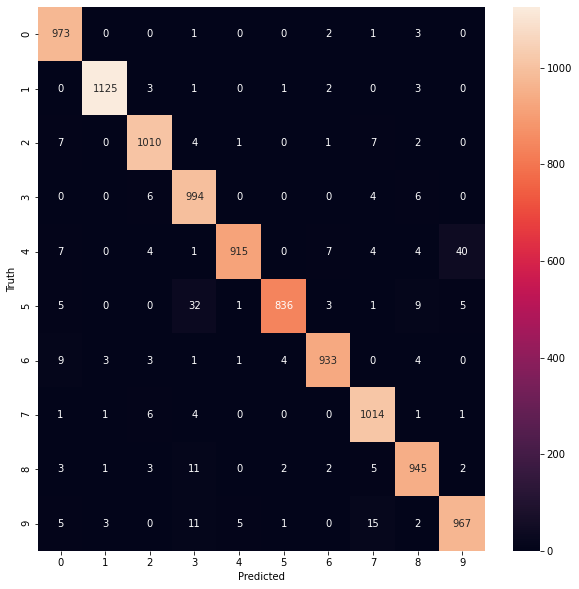

In [30]:
y_predicted_3 = model3.predict(x_test)
y_predicted_labels_3 = [np.argmax(i) for i in y_predicted_3]
cm = tf.math.confusion_matrix(y_test,y_predicted_labels_3)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')